# Kaggle Titanic

Будем решать задачу предсказания того, выжил пассажир Титаника или нет, по некоторым данным о пассажире.

In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\elena\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Загрузим данные и объединим train и test в один dataframe - так будет удобнее обрабатывать признаки.

In [26]:
Train = pd.read_csv("train.csv")
Test = pd.read_csv("test.csv")
Test['Survived'] = -1

Data = pd.concat([Train,Test])

C:\Users\elena\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [27]:
len(Train), len(Test), len(Data)

(891, 418, 1309)

# Обработка признаков

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

Обработаем признак 'Sex'

In [28]:
print(Data['Sex'].value_counts(dropna=False))

male      843
female    466
Name: Sex, dtype: int64


In [29]:
Data['sex'] = Data.apply(lambda row: 1 if row.Sex == 'male' else 0, axis=1)

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

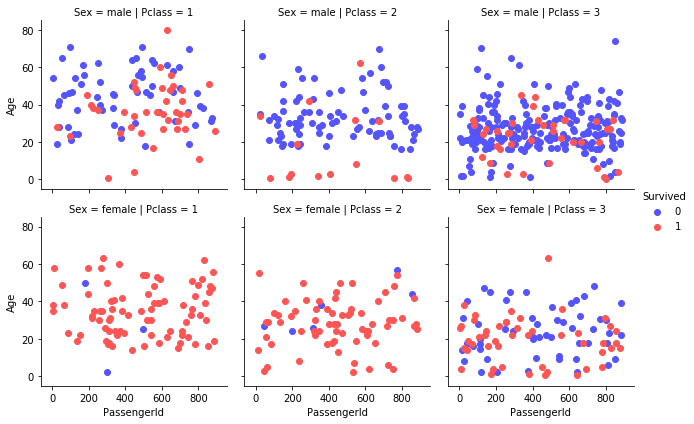

In [30]:
import seaborn as sns

grid = sns.FacetGrid(Data[Data.Survived!=-1], col = "Pclass", row = "Sex", hue = "Survived", \
                     palette = 'seismic')
grid = grid.map(plt.scatter, "PassengerId", "Age")
grid.add_legend()
grid

Обработаем признак 'Embarked'

In [31]:
Data['Embarked'].value_counts(dropna=False)

S      914
C      270
Q      123
NaN      2
Name: Embarked, dtype: int64

In [32]:
Data['EmbS'] = Data.apply(lambda row: 1 if row.Embarked == 'S' else 0, axis=1)
Data['EmbC'] = Data.apply(lambda row: 1 if row.Embarked == 'C' else 0, axis=1)
Data['EmbQ'] = Data.apply(lambda row: 1 if row.Embarked == 'Q' else 0, axis=1)

Обработаем признак 'Age'

1) Проверьте, если ли в Age пропущенные значения

2) Если пропущенные значения есть, заполните их медианным значением Age

In [33]:
#есть ли Nanы в Age?
#Your code here

Data['Age'].value_counts(dropna=False)

NaN       263
 24.00     47
 22.00     43
 21.00     41
 30.00     40
 18.00     39
 25.00     34
 28.00     32
 36.00     31
 26.00     30
 29.00     30
 27.00     30
 19.00     29
 23.00     26
 32.00     24
 31.00     23
 35.00     23
 20.00     23
 33.00     21
 45.00     21
 39.00     20
 17.00     20
 16.00     19
 42.00     18
 40.00     18
 34.00     16
 50.00     15
 38.00     14
 47.00     14
 48.00     14
         ... 
 59.00      3
 0.75       3
 0.83       3
 0.92       2
 71.00      2
 70.00      2
 45.50      2
 30.50      2
 34.50      2
 36.50      2
 14.50      2
 0.17       1
 67.00      1
 55.50      1
 38.50      1
 60.50      1
 70.50      1
 20.50      1
 0.33       1
 0.42       1
 66.00      1
 11.50      1
 26.50      1
 76.00      1
 23.50      1
 22.50      1
 74.00      1
 24.50      1
 80.00      1
 0.67       1
Name: Age, Length: 99, dtype: int64

In [34]:
Data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,sex,EmbS,EmbC,EmbQ
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,1,1,0,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,0,0,1,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,0,1,0,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,0,1,0,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,1,1,0,0


In [35]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

#Заполните пропущенные значения Age медианным значением
#Your code here

Различные способы визуализации данных упрощают понимание признаков и зависимостей между ними.

Посмотрим на распределение Pclass по возрастам.

C:\Users\elena\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\elena\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


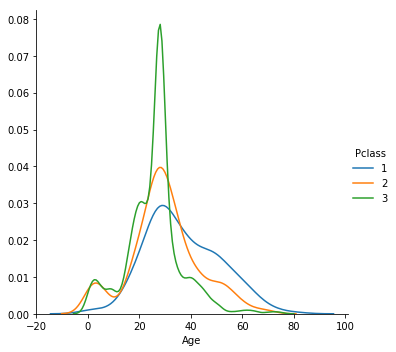

In [36]:
import seaborn as sns

Data[Data.Survived!=-1][['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
# plot age distribution by title
facet = sns.FacetGrid(data = Data[Data.Survived!=-1], hue = "Pclass", legend_out=True, size = 5)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

Обработаем признак 'Fare'

1) Проверьте, если ли в Fare пропущенные значения

2) Если пропущенные значения есть, заполните их медианным значением Fare

In [37]:
#Your code here

median_fare = Data['Fare'].median()

Data['Fare'].fillna(median_fare, inplace=True)

Обработаем признак 'Pclass'

Есть ли в Pclass пропущенные значения? Если есть, обработайте их.

In [38]:
#Your code here

Data['Pclass'].value_counts(dropna=False)

3    709
1    323
2    277
Name: Pclass, dtype: int64

Обработаем признак 'SibSp' (число братьев или сестер, мужей, жен)

Есть ли в SibSp пропущенные значения? Если есть, обработайте их.

In [39]:
#Your code here
Data['SibSp'].value_counts(dropna=False)

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

Обработаем признак 'Parch' (число родителей/детей)

Есть ли в Parch пропущенные значения? Если есть, обработайте их.

In [40]:
#Your code here
Data['Parch'].value_counts(dropna=False)

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

# Разбиение Data на Train и Test и получение первого предсказания

1) оставьте в таблице Data только числовые признаки -> All

2) разбейте таблицу All на Xtrain, ytrain и Xtest.

In [41]:
All = Data[['Survived','Age','EmbS','EmbC','EmbQ','sex','Fare','Parch','Pclass','SibSp']]

Xtrain = All[All.Survived!=-1][['Age','EmbS','EmbC','EmbQ','sex','Fare',\
                                'Parch','Pclass','SibSp']]
ytrain = All[All.Survived!=-1]['Survived']

Xtest = All[All.Survived==-1][['Age','EmbS','EmbC','EmbQ','sex','Fare',\
                                'Parch','Pclass','SibSp']]
#Your code here

len(Xtrain), len(Xtest)

(891, 418)

Обучим RandomForest на очищенных данных и посмотрим на качество на кросс-валидации

In [53]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=123, n_estimators=100, n_jobs=-1)
cross_val_score(rf, Xtrain, ytrain, cv=10, scoring='accuracy').mean()

0.8149401316536148

Предскажем ответы на тесте и сделаем первый submit на Kaggle

1) сделаем предсказания и сохраним их в файл titanic_prediction_0.csv

2) загрузим этот файл на kaggle и посмотрим на результат

In [54]:
rf.fit(Xtrain, ytrain)

pred_rf = rf.predict(Xtest)

Test['Survived']=pred_rf

Test[['PassengerId','Survived']].to_csv('titanic_prediction_26may_1.csv',index=False)

# Настройка параметров модели

In [57]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(RandomForestClassifier(random_state=123, n_jobs=-1),
                  param_grid={'n_estimators': np.arange(100,1100,100)},
                  cv=cv,
                  scoring='accuracy')
gs.fit(Xtrain, ytrain)
gs.best_score_, gs.best_estimator_, gs.best_params_

Wall time: 0 ns


KeyboardInterrupt: 

In [28]:
gs = GridSearchCV(RandomForestClassifier(random_state=123, n_jobs=-1),
                  param_grid={'n_estimators': [800,900,1000],
                              'max_depth': [1,3,5,7,9,11]},
                  cv=cv,
                  scoring='accuracy')
gs.fit(Xtrain, ytrain)
gs.best_score_, gs.best_estimator_, gs.best_params_

(0.8417508417508418,
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=9, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=-1,
             oob_score=False, random_state=123, verbose=0, warm_start=False),
 {'max_depth': 9, 'n_estimators': 900})

In [29]:
gs = GridSearchCV(RandomForestClassifier(n_estimators=900, max_depth=9, random_state=123, n_jobs=-1),
                  param_grid={'min_samples_split':[2,4,6],
                              'min_samples_leaf':[1,2,4,6]},
                  cv=cv,
                  scoring='accuracy')
gs.fit(Xtrain, ytrain)
gs.best_score_, gs.best_estimator_, gs.best_params_

(0.8428731762065096,
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=9, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=-1,
             oob_score=False, random_state=123, verbose=0, warm_start=False),
 {'min_samples_leaf': 2, 'min_samples_split': 2})

Подберите с помощью GridSearchCV информационный критерий ('criterion': ['gini','entropy']). Используйте в RandomForestClassifier значения всех найденных параметров. 

In [31]:
#Your code here

gs = GridSearchCV(RandomForestClassifier(n_estimators=900, max_depth=9, \
                                         min_samples_split=2, \
                                         min_samples_leaf=2,  
                                         random_state=123, n_jobs=-1),
                  param_grid={'criterion':['gini','entropy']},
                  cv=cv,
                  scoring='accuracy')
gs.fit(Xtrain, ytrain)
gs.best_score_, gs.best_estimator_, gs.best_params_

(0.8428731762065096,
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=9, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=-1,
             oob_score=False, random_state=123, verbose=0, warm_start=False),
 {'criterion': 'gini'})

Посмотрим на важность признаков по мнению RandomForestClassifier

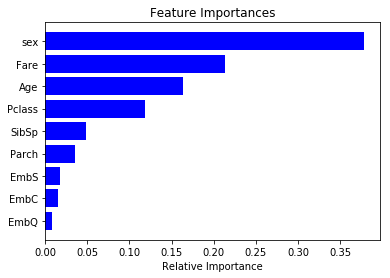

In [58]:
rf = RandomForestClassifier(n_estimators=900, max_depth=9, min_samples_split=2, \
                            min_samples_leaf=2, criterion='gini',
                            random_state=123, n_jobs=-1)
rf.fit(Xtrain, ytrain)

features = Xtrain.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

Сделаем второе предсказание с учётом настроенных параметров модели

1) обучите RandomForest с найденными параметрами и сделайте предсказание

2) отправьте его на Kaggle

In [33]:
#Your code here

pred_rf = rf.predict(Xtest)

Test['Survived']=pred_rf

Test[['PassengerId','Survived']].to_csv('titanic_prediction_26may_2.csv',index=False)

# Работа с признаками

Нарисуем матрицу корреляций признаков между собой и с целевой переменной

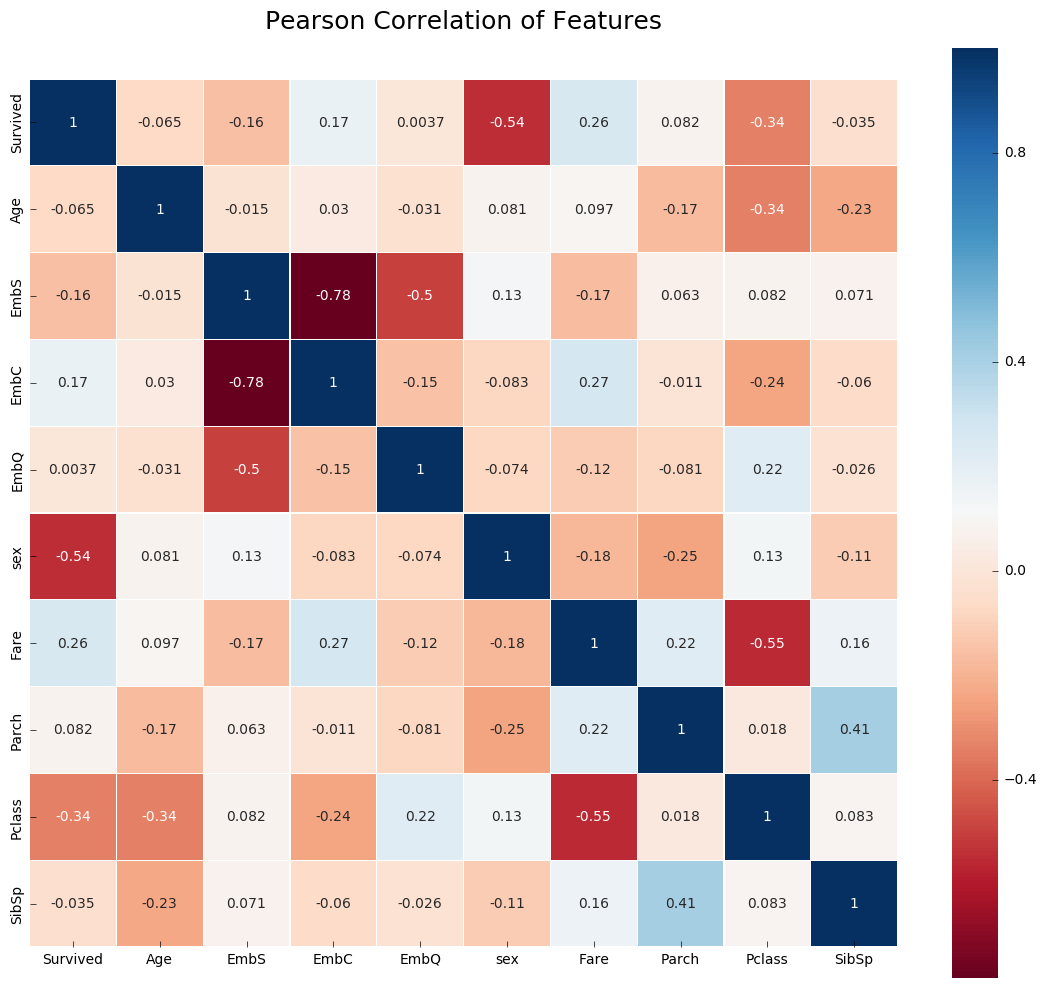

In [34]:
import seaborn as sns

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(All[All.Survived!=-1].astype(float).corr(),linewidths=0.1,vmax=1.0, #correlation matrix
            square=True, cmap=colormap, linecolor='white', annot=True)

C:\Program Files\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Program Files\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


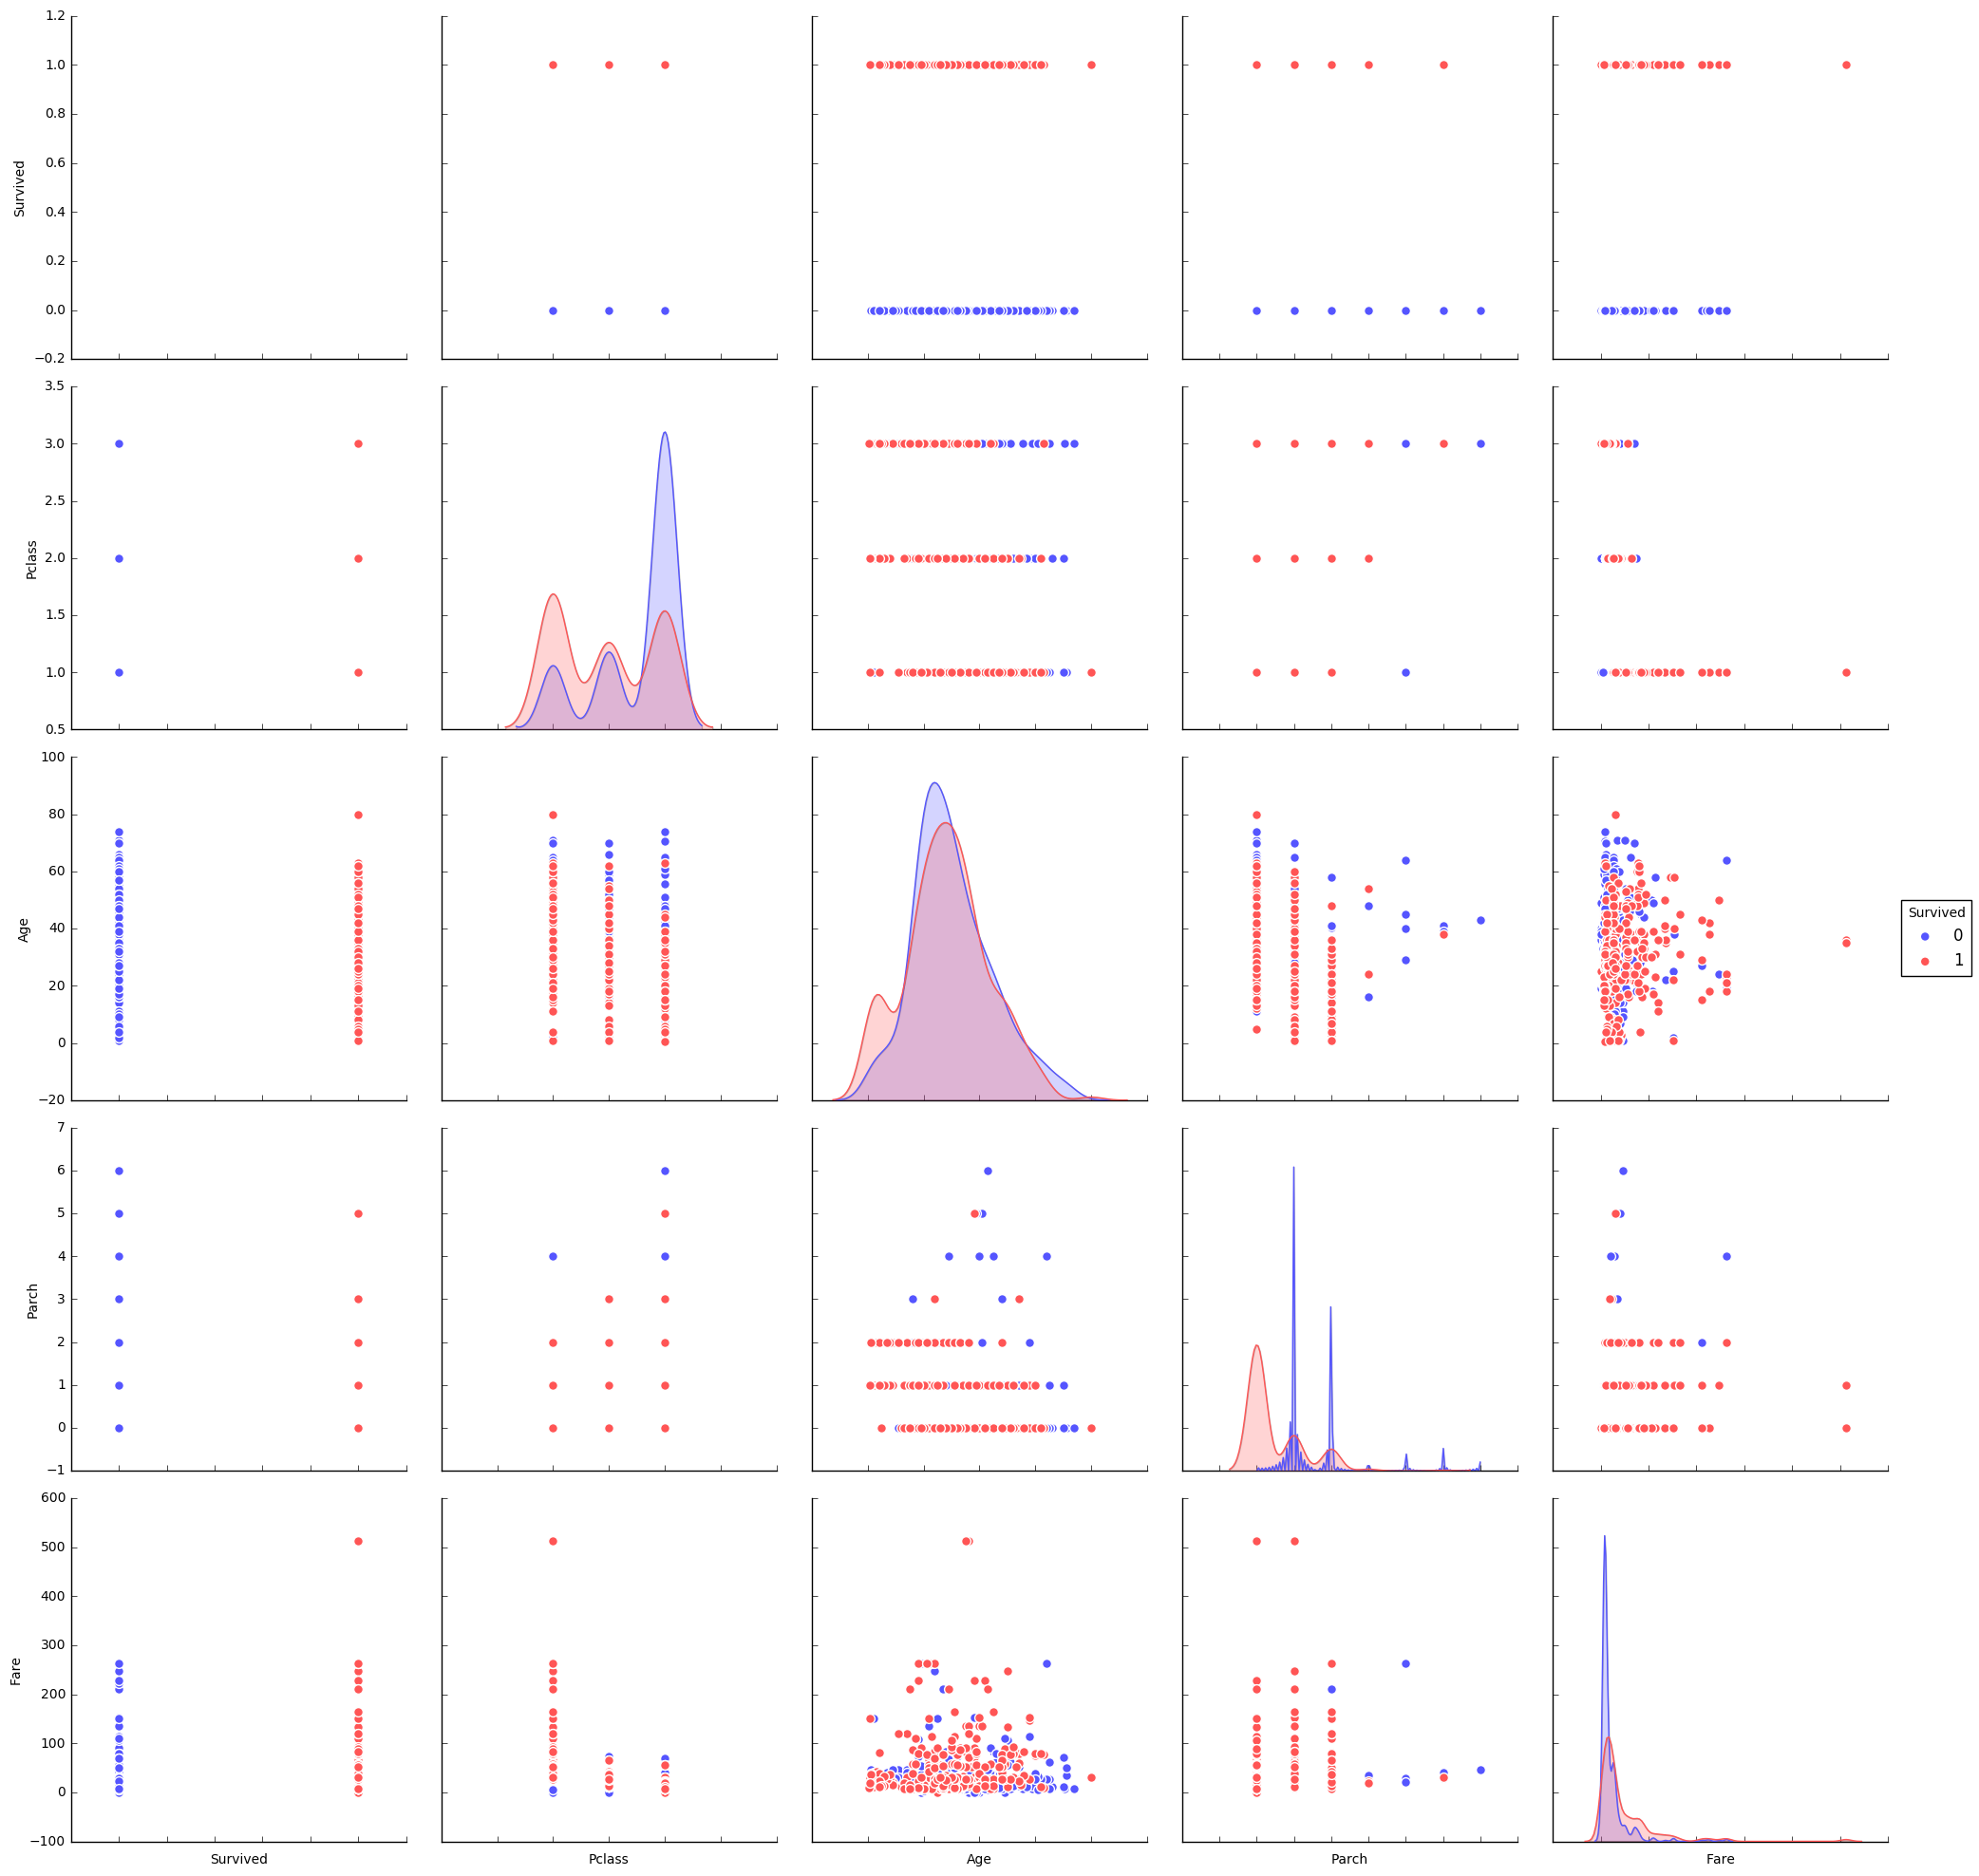

In [22]:
g = sns.pairplot(Data[Data.Survived!=-1][[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked']], \
                 hue='Survived', palette = 'seismic',size=4,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=50) )
g.set(xticklabels=[])

Бинаризуем признаки Age и Fare

* pd.cut - разбиение целочисленных данных на несколько интервалов по квантилям
* pd.qcut - разбиение числовых (не обязательно целочисленных) данных на несколько интервалов по квантилям

In [38]:
Data['AgeBin'] = pd.cut(Data['Age'].astype(int), 5)

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
Data['AgeBin_Code'] = label.fit_transform(Data['AgeBin'])

print(Data[['Age','AgeBin','AgeBin_Code']])

      Age         AgeBin  AgeBin_Code
0    22.0   (16.0, 32.0]            1
1    38.0   (32.0, 48.0]            2
2    26.0   (16.0, 32.0]            1
3    35.0   (32.0, 48.0]            2
4    35.0   (32.0, 48.0]            2
5    28.0   (16.0, 32.0]            1
6    54.0   (48.0, 64.0]            3
7     2.0  (-0.08, 16.0]            0
8    27.0   (16.0, 32.0]            1
9    14.0  (-0.08, 16.0]            0
10    4.0  (-0.08, 16.0]            0
11   58.0   (48.0, 64.0]            3
12   20.0   (16.0, 32.0]            1
13   39.0   (32.0, 48.0]            2
14   14.0  (-0.08, 16.0]            0
15   55.0   (48.0, 64.0]            3
16    2.0  (-0.08, 16.0]            0
17   28.0   (16.0, 32.0]            1
18   31.0   (16.0, 32.0]            1
19   28.0   (16.0, 32.0]            1
20   35.0   (32.0, 48.0]            2
21   34.0   (32.0, 48.0]            2
22   15.0  (-0.08, 16.0]            0
23   28.0   (16.0, 32.0]            1
24    8.0  (-0.08, 16.0]            0
25   38.0   

Бинаризуйте Fare, используя разбиение на 4 интервала

In [39]:
#Your code here

Data['FareBin'] = pd.qcut(Data['Fare'], 4)

label = LabelEncoder()
Data['FareBin_Code'] = label.fit_transform(Data['FareBin'])

Сконструируем новые признаки

1) Какую информацию можно извлечь из поля Name?

2) Какую информацию можно извлечь из поля Cabin?

3) Из матрицы корреляций мы видим, что признаки SibSp и Parch практически не коррелируют с таргетом. Какую информацию можно из них извлечь, исходя из смысла задачи?

In [48]:
#Your code here

Data['NameLen'] = Data['Name'].apply(len)

Data['FamilySize'] = Data['Parch'] + Data['SibSp'] + 1

Data['IsAlone'] = Data.apply(lambda row: 1 if row.FamilySize == 1 else 0, axis=1)

1) добавьте сконструированные признаки в таблицу All

2) нарисуйте новую матрицу корреляций

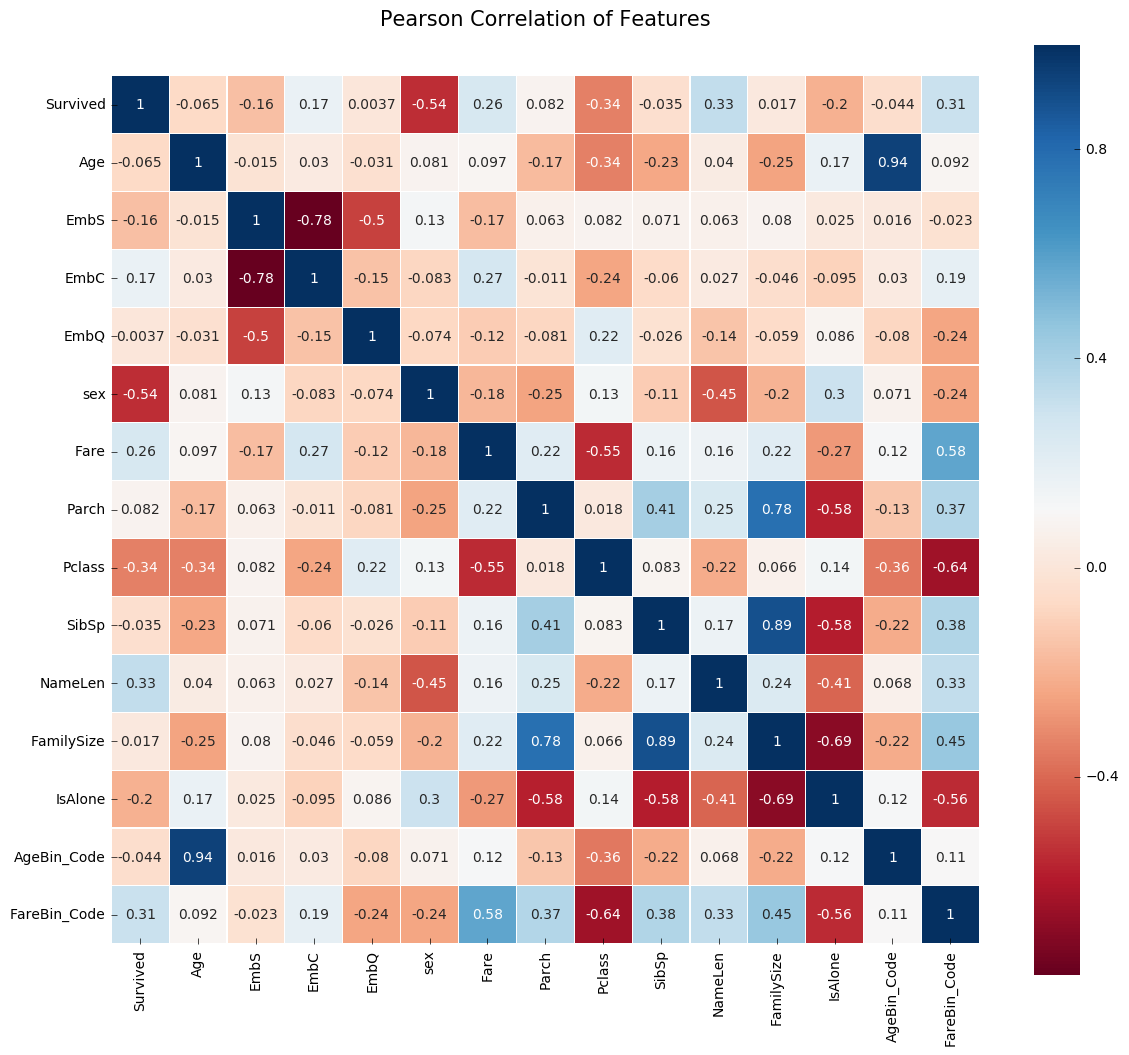

In [51]:
All = Data[['Survived','Age','EmbS','EmbC','EmbQ','sex','Fare','Parch','Pclass',\
            'SibSp','NameLen','FamilySize','IsAlone','AgeBin_Code','FareBin_Code']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(All[All.Survived!=-1].astype(float).corr(),linewidths=0.1,vmax=1.0, #correlation matrix
            square=True, cmap=colormap, linecolor='white', annot=True)

# Обучение и настройка параметров RandomForest для таблицы с добавленными признаками

1) Теперь в таблице All появились новые признаки. Заново разбейте её на Xtrain, ytrain и Xtest.

2) Найдите оптимальные параметры RandomForest для новых данных.

3) Сделайте предсказание, сохраните его в файл и отправьте на Kaggle.

In [ ]:
#Your code here

# Другие алгоритмы ML

# Градиентный бустинг

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=123)
cross_val_score(clf, Xtrain, ytrain, cv=cv, scoring='accuracy').mean()

Подберите оптимальные параметры для градиентного бустинга

In [ ]:
#Your code here

In [ ]:
gb = GradientBoostingClassifier(learning_rate=..., n_estimators=..., max_depth=..., min_samples_split=..., min_samples_leaf=...,\
                                             random_state=123)
gb.fit(Xtrain, ytrain)

features = Xtrain.columns
importances = gb.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state=123)
cross_val_score(clf, Xtrain, ytrain, cv=cv, scoring='accuracy').mean()

Подберите n_estimaors и learning_rate для AdaBoost

In [ ]:
#Your code here

In [ ]:
ada = AdaBoostClassifier(learning_rate=..., n_estimators=..., random_state=123)
print cross_val_score(ada, Xtrain, ytrain, cv=cv, scoring='accuracy').mean()

ada.fit(Xtrain, ytrain)

# Extra Trees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(random_state=123, n_jobs=-1)
print cross_val_score(clf, Xtrain, ytrain, cv=cv, scoring='accuracy').mean()

Подберите оптимальные параметры для ExtraTrees (n_estimators, max_depth, min_samples_split, min_samples_leaf)

In [ ]:
#Your code here

In [ ]:
clf = ExtraTreesClassifier(n_estimators=..., max_depth=..., min_samples_split=..., min_samples_leaf=..., \
                           random_state=123, n_jobs=-1)
print cross_val_score(clf, Xtrain, ytrain, cv=cv, scoring='accuracy').mean()

Нарисуйте гистограмму важности признаков для ExtraTreesClassifier

In [ ]:
#Your code here

# Построение предсказания, использующего все натренированные алгоритмы

# Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('RF',rf),('GB',gb),('ADA',ada),('ET',et)], voting='soft')
voting.fit(Xtrain, ytrain)
pred_voting = voting.predict(XtestFull)

In [ ]:
cross_val_score(voting, Xtrain, ytrain, cv=cv, scoring='accuracy').mean()

Добавьте столбец с предсказанием в таблицу Test и сохраните предсказание в файл. Отправьте его на Kaggle.

In [ ]:
#Your code here

# Blending

Предскажите каждым алгоритмом не классы, а вероятности классов (predict_proba).

In [ ]:
rf_probas = ...
gb_probas = ...
ada_probas = ...
et_probas = ...

In [ ]:
blended_probas = 0.25 * (rf_probas+gb_probas+ada_probas+et_probas)

prediction = [1 if elem > 0.5 else 0 for elem in blended_probas]

In [ ]:
Test['Survived']=prediction

Test[['PassengerId','Survived']].to_csv('titanic_prediction_blending.csv',index=False)

# Stacking

Для того, чтобы сделать стэкинг, нам придется разбить Xtrain,ytrain на две части. На первой будем обучать алгоритмы первого уровня (RF, GB и т.д.), а на второй - обучать метаалгоритм, т.е. алгоритм, признаками для которого являются ответы алгоритмов первого уровня.

In [ ]:
Xtrain1, Xtrain2, ytrain1, ytrain2 = train_test_split(XtrainFull, ytrainfull, test_size=0.33)

Ещё раз переобучите все алгоритмы и настройте их параметры, но уже на уменьшенных данных - Xtrain1, ytrain1

Сделайте предсказания на Xtrain2 каждым из алгоритмов. Предсказывайте вероятности, а не классы (predict_proba)

In [ ]:
#Your code here

In [ ]:
SecondTrain = pd.DataFrame(np.nan, index=np.arange(len(Xtrain2)), columns=['RF','GB','ADA','ET'])

SecondTrain['RF'] = rf.predict(Xtrain2)
SecondTrain['GB'] = gb.predict(Xtrain2)
SecondTrain['ADA'] = ada.predict(Xtrain2)
SecondTrain['ET'] = et.predict(Xtrain2)

В качестве метаалгоритма будем использовать RandomForest. Подберите оптимальные параметры метаалгоритма.

In [ ]:
gs = GridSearchCV(RandomForestClassifier(random_state=111, n_jobs=-1),
                  param_grid={'n_estimators':np.arange(100,1100,100)},
                  cv=3,
                  scoring='accuracy')
gs.fit(SecondTrain, ytrain2)
gs.best_estimator_, gs.best_params_, gs.best_score_

In [ ]:
#Your code here

Сделаем предсказание нашего двухступенчатого алгоритма на Xtest.

In [ ]:
PredTest = pd.DataFrame(np.nan, index=np.arange(len(Xtest)), columns=['RF','GB','ADA','ET'])

PredTest['RF'] = rf.predict(Xtest)
PredTest['GB'] = gb.predict(Xtest)
PredTest['ADA'] = ada.predict(Xtest)
PredTest['ET'] = et.predict(Xtest)

pred_final = rf_final.predict(PredTest)

print len(Xtest), len(pred_final)

Сохраните предсказания в файл и отправьте файл на Kaggle.

In [ ]:
#Your code here

# Дальнейшие улучшения

1) Попробуйте использовать xgboost и catboost в качестве моделей первого уровня и/или второго уровня

2) Подумайте над признаками. Какие ещё факторы можно извлечь из данных?

3) Попробуйте снизить размерность пространства признаков: 

а) используйте feature_selection

b) используйте методы снижения размерности

4) Подумайте над другими способами кодирования категориальных признаков

In [1]:
#Your code here